# Solution for Assignment A2


Team J
- Hardik Bishnoi
- B Dhanush Adhitya
- Aishwarya Ravichandran

# Importing all the required packages for data preprocessing and DTM creation

In [7]:
import re
import pandas as pd
import numpy as np 
from symspellpy import SymSpell, Verbosity
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  
nltk.download('wordnet')
from nltk.corpus import stopwords
import string as s
import matplotlib.pyplot as plt
%matplotlib inline
import pkg_resources
import contractions
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text  import TfidfVectorizer

[nltk_data] Downloading package punkt to /home/snow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/snow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Reading the news data and storing it in a dataset 

In [8]:
dataset = pd.read_csv('data/News_Category_Dataset_v3.csv')
dataset.shape

(209527, 8)

# Counting the total number of articles for each news category

In [9]:
dataset['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

# Printing all the unique news category

In [10]:
target_category = dataset['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


# Assigning a category_id for each unique news category and tagging them to the dataset

In [11]:
dataset['category_id'] = dataset['category'].factorize()[0]
dataset.head()

,Unnamed: 0,headline,category,short_description,authors,date,headline_length,short_description_length,category_id
0,0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,76,154,0
1,1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,89,159,0
2,2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,69,64,1
3,3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,56,159,2
4,4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,77,156,0


# Printing all the unique news catgeory and their respective ids

In [12]:
category = dataset[['category','category_id']].drop_duplicates().sort_values('category_id')
print(category)

              category  category_id
0            U.S. NEWS            0
2               COMEDY            1
3            PARENTING            2
7           WORLD NEWS            3
8       CULTURE & ARTS            4
13                TECH            5
17              SPORTS            6
20       ENTERTAINMENT            7
21            POLITICS            8
29          WEIRD NEWS            9
32         ENVIRONMENT           10
94           EDUCATION           11
107              CRIME           12
114            SCIENCE           13
134           WELLNESS           14
162           BUSINESS           15
260     STYLE & BEAUTY           16
280       FOOD & DRINK           17
319              MEDIA           18
340       QUEER VOICES           19
394      HOME & LIVING           20
439              WOMEN           21
455       BLACK VOICES           22
892             TRAVEL           23
1796             MONEY           24
1861          RELIGION           25
2880     LATINO VOICES      

# Graphical representation of all the unique news category and the total count of the articles in each category

<Axes: xlabel='category_id', ylabel='count'>

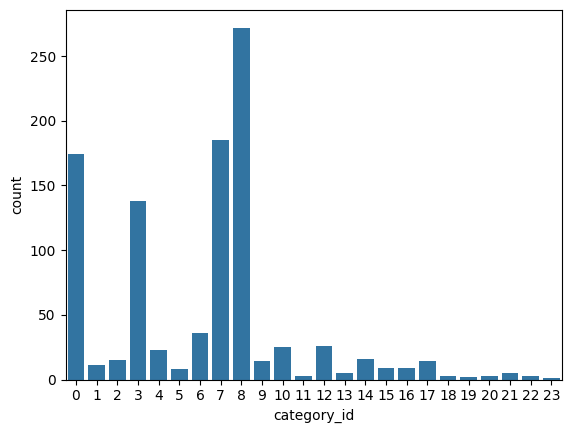

In [13]:
df=dataset[:1000]
sns.countplot(x='category_id',data=df)

# Word cloud representation of the education category, its print the frequency used words in this category in the word cloud

In [14]:
education = df.short_description[df.category_id[df.category_id==11].index]

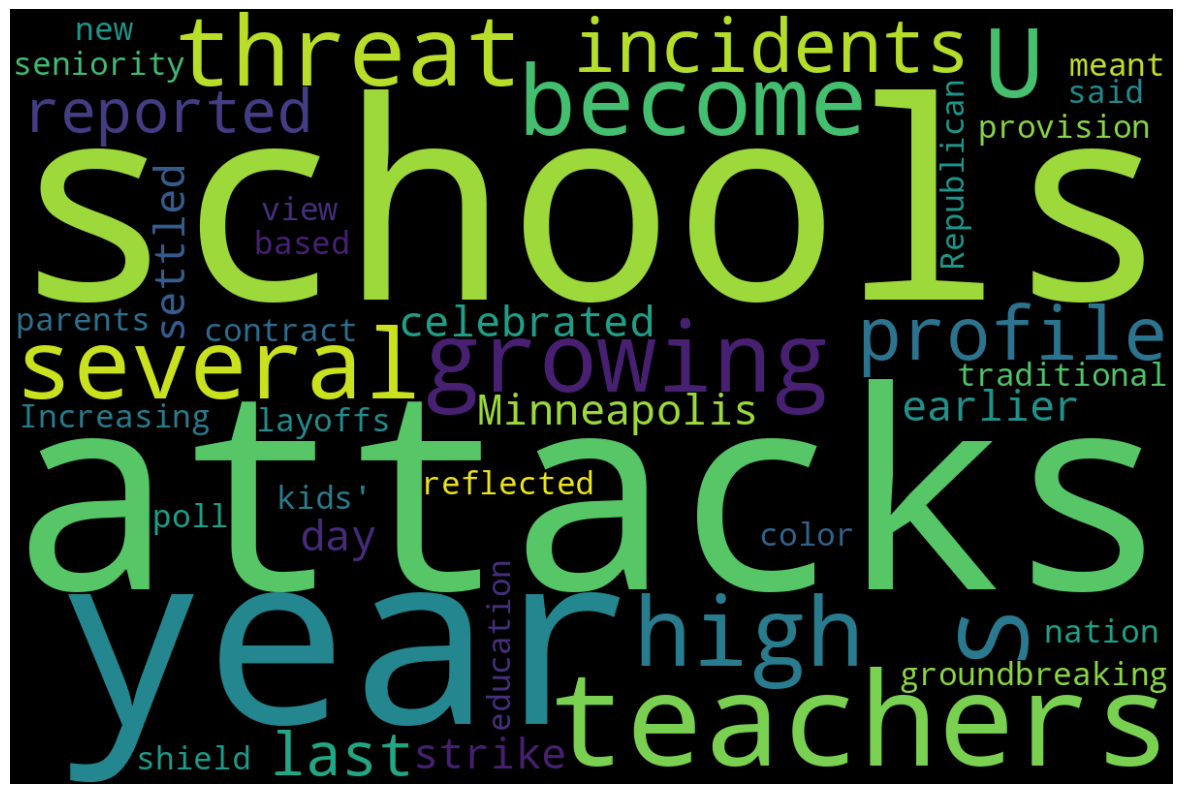

In [15]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(education))
plt.axis("off")
plt.imshow(wordcloud,interpolation = 'bilinear');

# Word cloud representation of the sports category, its print the frequency used words in this category in the word cloud

In [16]:
sports = df.short_description[df.category_id[df.category_id==6].index]

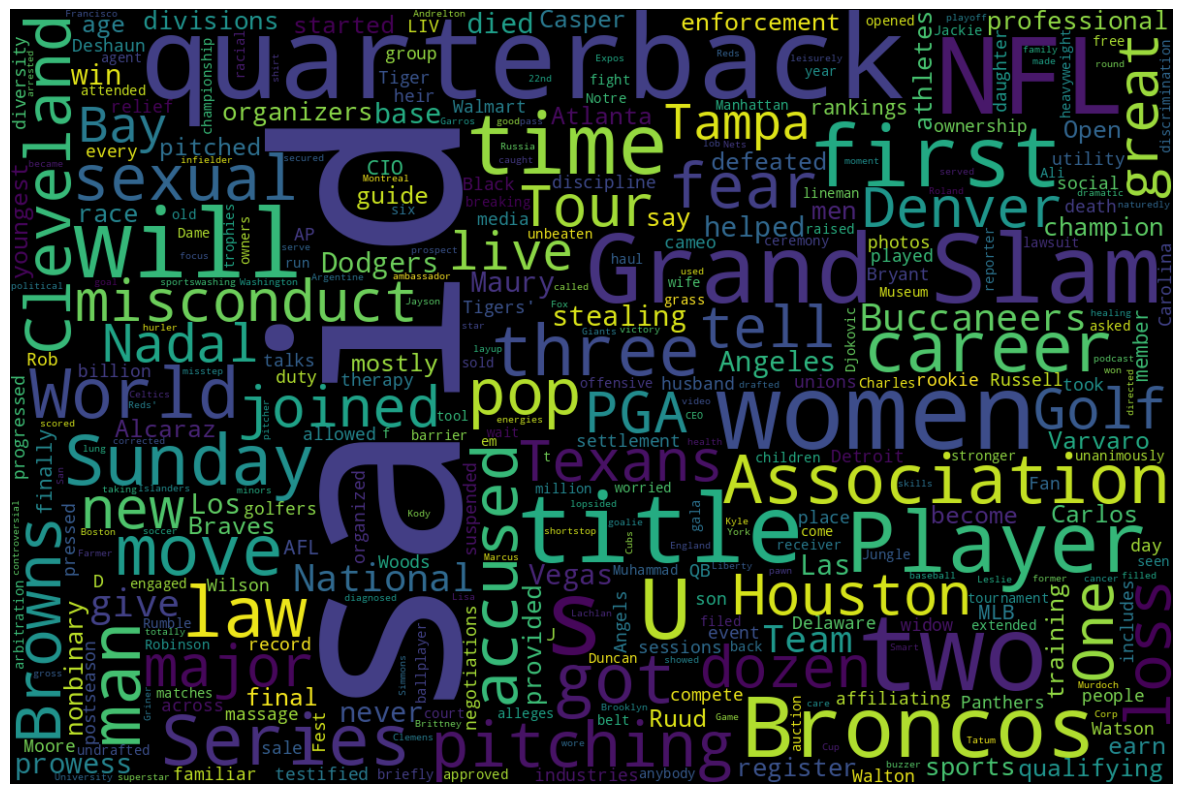

In [17]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sports))
plt.axis("off")
plt.imshow(wordcloud,interpolation = 'bilinear');

# Word cloud representation of the tech category, its print the frequency used words in this category in the word cloud

In [18]:
tech = df.short_description[df.category_id[df.category_id==5].index]

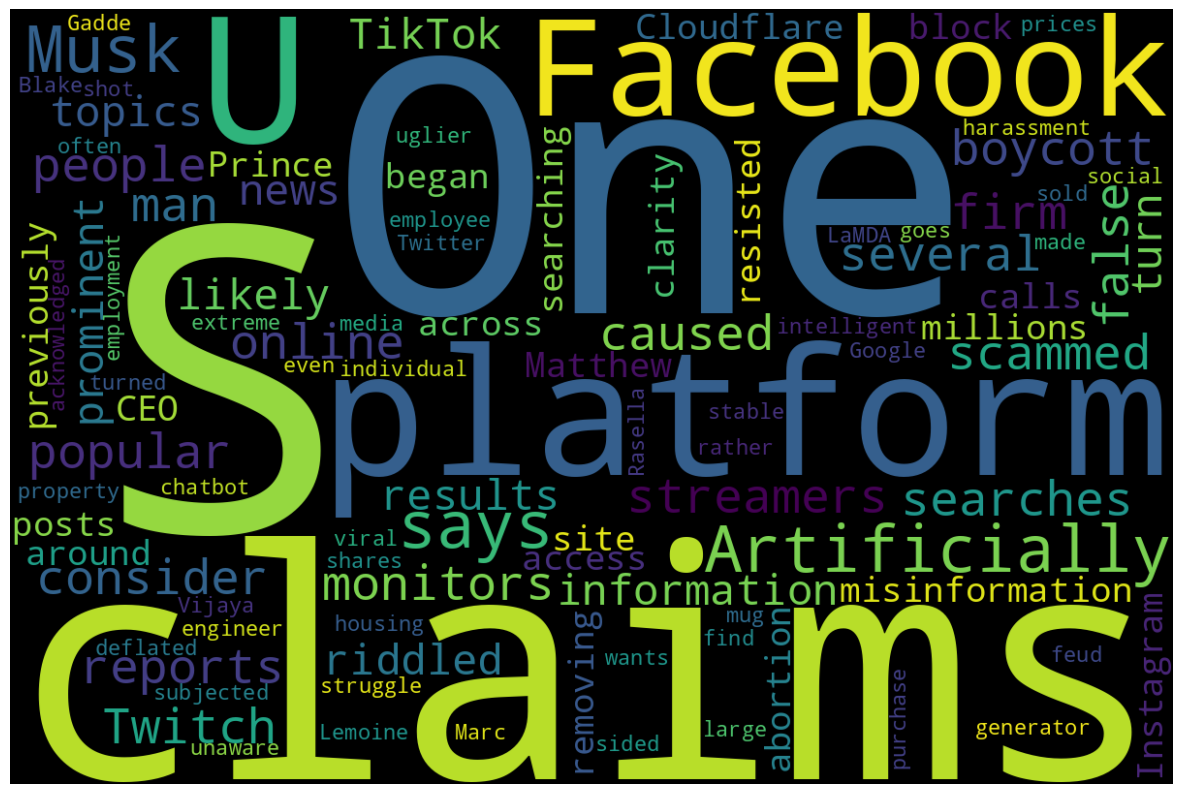

In [19]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(tech))
plt.axis("off")
plt.imshow(wordcloud,interpolation = 'bilinear');

# Dividing the dataset and assigning 60000 records as training set

In [20]:
train_set = pd.DataFrame({'news_desc': dataset.short_description[:60000],'category_id':dataset.category_id[:60000]})
train_set.head(10)

,news_desc,category_id
0,Health experts said it is too early to predict...,0
1,He was subdued by passengers and crew when he ...,0
2,"""Until you have a dog you don't understand wha...",1
3,"""Accidentally put grown-up toothpaste on my to...",2
4,Amy Cooper accused investment firm Franklin Te...,0
5,The 63-year-old woman was seen working at the ...,0
6,"""Who's that behind you?"" an anchor for New Yor...",0
7,More than half a million people remained witho...,3
8,"In ""Mija,"" director Isabel Castro combined mus...",4
9,White House officials say the crux of the pres...,3


# Converting the dataset to lower case

In [21]:
train_set['news_desc'] = train_set['news_desc'].apply(lambda x: str(x).lower())
train_set.head(10)

,news_desc,category_id
0,health experts said it is too early to predict...,0
1,he was subdued by passengers and crew when he ...,0
2,"""until you have a dog you don't understand wha...",1
3,"""accidentally put grown-up toothpaste on my to...",2
4,amy cooper accused investment firm franklin te...,0
5,the 63-year-old woman was seen working at the ...,0
6,"""who's that behind you?"" an anchor for new yor...",0
7,more than half a million people remained witho...,3
8,"in ""mija,"" director isabel castro combined mus...",4
9,white house officials say the crux of the pres...,3


# Removing special characters from the dataset

In [22]:
train_set['news_desc'] = train_set['news_desc'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))
train_set.head(10)


,news_desc,category_id
0,health experts said it is too early to predict...,0
1,he was subdued by passengers and crew when he ...,0
2,until you have a dog you dont understand what ...,1
3,accidentally put grownup toothpaste on my todd...,2
4,amy cooper accused investment firm franklin te...,0
5,the 63yearold woman was seen working at the so...,0
6,whos that behind you an anchor for new york’s ...,0
7,more than half a million people remained witho...,3
8,in mija director isabel castro combined music ...,4
9,white house officials say the crux of the pres...,3


# Standardising the data format in the dataset

In [23]:
train_set['news_desc'] = train_set['news_desc'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))
train_set.head(10)

,news_desc,category_id
0,health experts said it is too early to predict...,0
1,he was subdued by passengers and crew when he ...,0
2,until you have a dog you dont understand what ...,1
3,accidentally put grownup toothpaste on my todd...,2
4,amy cooper accused investment firm franklin te...,0
5,the 63yearold woman was seen working at the so...,0
6,whos that behind you an anchor for new york’s ...,0
7,more than half a million people remained witho...,3
8,in mija director isabel castro combined music ...,4
9,white house officials say the crux of the pres...,3


# Expanding english word (Eg: can't -> cannot)

In [24]:
import contractions

train_set['news_desc'] = train_set['news_desc'].apply(lambda x: contractions.fix(x))
train_set.head(10)

,news_desc,category_id
0,health experts said it is too early to predict...,0
1,he was subdued by passengers and crew when he ...,0
2,until you have a dog you do not understand wha...,1
3,accidentally put grownup toothpaste on my todd...,2
4,amy cooper accused investment firm franklin te...,0
5,the 63yearold woman was seen working at the so...,0
6,who is that behind you an anchor for new york’...,0
7,more than half a million people remained witho...,3
8,in mija director isabel castro combined music ...,4
9,white house officials say the crux of the pres...,3


# Removing stop words

In [25]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
additional_stopwords = {'is', 'of', 'an'}

stop_words.update(additional_stopwords)
train_set['news_desc'] = train_set['news_desc'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
train_set.head(10)

[nltk_data] Downloading package stopwords to /home/snow/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,news_desc,category_id
0,health experts said early predict whether dema...,0
1,subdued passengers crew fled back aircraft con...,0
2,dog understand could eaten,1
3,accidentally put grownup toothpaste toddler’s ...,2
4,amy cooper accused investment firm franklin te...,0
5,63yearold woman seen working south carolina st...,0
6,behind anchor new york’s pix11 asked journalis...,0
7,half million people remained without water ser...,3
8,mija director isabel castro combined music doc...,4
9,white house officials say crux presidents visi...,3


# Printing the first record in the training set

In [26]:
train_set['news_desc'][0]

'health experts said early predict whether demand would match 171 million doses new boosters us ordered fall'

# Printing the training set records

In [ ]:
train_set

,news_desc,category_id
0,health experts said early predict whether dema...,0.0
1,subdued passengers crew fled back aircraft con...,0.0
2,dog understand could eaten,1.0
3,accidentally put grownup toothpaste toddler’s ...,2.0
4,amy cooper accused investment firm franklin te...,0.0
...,...,...
59995,historians see trump biggest liar presidential...,NaN
59996,separate incidents caught camera,NaN
59997,recently felt like minor landslide overwhelm h...,NaN
59998,warning photos faint heart,NaN


# Normalizing data

Data normalization is important to reduce sparseness and remove faulty aspects of the data.

# Spell Correction

In [ ]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary( dictionary_path,term_index=0, count_index=1)

True

In [ ]:
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term if suggestions else text

train_set['news_desc'] = train_set['news_desc'].apply(correct_spelling)

# Splitting joined words

In [ ]:
import wordninja

for x in range(len(train_set['news_desc'])):
    tokens = word_tokenize(train_set['news_desc'][x])
    for i in range(len(tokens)):
        for x in wordninja.split(tokens[i]):
            tokens.append(x)
        
    train_set['news_desc'][x] = ' '.join(tokens)

# Removing Alphanumerics

Let's remove numbers/alphanumerics from the column because a lot of unwanted alphanumeric tokens populate the dataset. There will be some information loss about dosages, but since these dosages often require context and are either very repititive or too rare as tokens, they are not as useful to the machine as more clean, uniform data.

In [ ]:
train_set['news_desc'] = train_set['news_desc'].str.replace('\d+', '', regex=True)

# Lemmatization and Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming and lemmatizing the words in the lemmatized_notes column
train_set['news_desc'] = train_set['news_desc'].apply(lambda x: ' '.join([lemmatizer.lemmatize(stemmer.stem(word)) for word in x.split()]))

stemmer = PorterStemmer()

# Stemming the words in the lemmatized_notes column
train_set['news_desc'] = train_set['news_desc'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Creating TF-IDF DTM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating the TF-IDF matrix with the stemmed notes
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=4)
dtm = tfidf_vectorizer.fit_transform(train_set['news_desc'].astype(str))

# Converting it to a data frame
dtm_df = pd.DataFrame(dtm.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Printing the data frame obtained
print(dtm_df)

       aaron   ab  aba  aback  abandon  abba  abbey  abbott  abc  abduct  ...  \
0        0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
1        0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
2        0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
3        0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
4        0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
...      ...  ...  ...    ...      ...   ...    ...     ...  ...     ...  ...   
59995    0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
59996    0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
59997    0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
59998    0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   
59999    0.0  0.0  0.0    0.0      0.0   0.0    0.0     0.0  0.0     0.0  ...   

       zimbabw  zimmerman  

In [ ]:
dtm_df.columns[800:900]

Index(['bitch', 'bite', 'bitten', 'bitter', 'bittersweet', 'bizarr', 'black',
       'blackfac', 'blackish', 'blacklist', 'blackmail', 'blackout', 'blade',
       'blah', 'blair', 'blake', 'blame', 'blanc', 'blanch', 'blank',
       'blanket', 'blare', 'blase', 'blast', 'blatant', 'blatantli', 'blaze',
       'bleach', 'bleak', 'bleed', 'blend', 'bless', 'blew', 'blight', 'blind',
       'blink', 'bliss', 'blister', 'blitz', 'blizzard', 'bloat', 'bloc',
       'block', 'blockad', 'blockbust', 'blog', 'blogger', 'blond', 'blood',
       'bloodi', 'bloodsh', 'bloom', 'blooper', 'blossom', 'blow', 'blower',
       'blown', 'blu', 'blue', 'blueprint', 'blunder', 'blunt', 'blur',
       'bluster', 'bo', 'board', 'boast', 'boat', 'bob', 'bobbi', 'bochum',
       'bodega', 'bodi', 'bodyguard', 'boe', 'bogu', 'boil', 'bol', 'bold',
       'boldli', 'bolster', 'bolt', 'bolton', 'bomb', 'bombard', 'bombast',
       'bomber', 'bombshel', 'bon', 'bona', 'bond', 'bone', 'bonni', 'bonu',
       'boo

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca_x = pca.fit_transform(dtm.toarray())
df_pca = pd.DataFrame(pca_x)
df_pca.shape

(60000, 3411)

In [ ]:
df_pca.to_csv('data/processed_news.csv', index=False)